
# SPECULA Adaptive Optics Tutorial: ANDES System
#
# This tutorial demonstrates the use of SPECULA (Simulation Package for Adaptive Optics with Python) for simulating the ANDES (ArmazoNes high Dispersion Echelle Spectrograph) adaptive optics system.
#
# **Presenter**: [Fabio Rossi]
# **Authors**: [Fabio Rossi, Guido Agapito, Alfio Puglisi]
# **SPECULA Repository**: https://github.com/ArcetriAdaptiveOptics/SPECULA
# **Documentation**: https://specula.readthedocs.io/



# 2.1 Installation

In [ ]:
%%capture
# optional, to have diagrams work
! apt-get install -y libcairo2-dev pkg-config python3-dev
! pip install pycairo orthogram

In [ ]:
! pip install specula==1.0.1 -q
! pip install pyyaml numpy matplotlib scipy ipywidgets -q

# 2.2 Mounting Google Drive for data storage

In [1]:
import sys
import os
from pathlib import Path
import sys
from PIL import Image

notebook_stdout = sys.stdout

In [ ]:
# Cell to run only Colab + GDrive
from google.colab import drive
drive.mount('/content/drive')

base_path = '/content/drive/MyDrive/HandsOnSPECULA'
calibration_path = os.path.join(base_path, 'calibration')

os.makedirs(base_path, exist_ok=True)
os.makedirs(calibration_path, exist_ok=True)

In [2]:
base_path = '/home/frossi/dev/SPECULA/config/HandsOnSPECULA'
calibration_path = os.path.join(base_path, 'calibration')

# 2.3 Running basic ANDES simulation, simplyfied

In [3]:
import yaml

simulation_filename = 'params_andes_basic.yml'
simulation_path = os.path.join(base_path, simulation_filename)
with open(simulation_path, 'r') as file:
    data = yaml.safe_load(file)

print(yaml.dump(data, default_flow_style=False, sort_keys=False))

main:
  class: SimulParams
  root_dir: /home/frossi/dev/SPECULA/config/HandsOnSPECULA/calibration
  pixel_pupil: 400
  pixel_pitch: 0.0975
  total_time: 0.2
  time_step: 0.002
  zenithAngleInDeg: 30.0
  display_server: false
seeing:
  class: WaveGenerator
  constant: 0.65
  outputs:
  - output
wind_speed:
  class: WaveGenerator
  constant:
  - 6
  - 10
  - 20
  outputs:
  - output
wind_direction:
  class: WaveGenerator
  constant:
  - -19.57
  - -174.84
  - 29.13
  outputs:
  - output
wfs_source:
  class: Source
  polar_coordinates:
  - 0.0
  - 0.0
  height: .inf
  magnitude: 8
  wavelengthInNm: 800
pupilstop:
  class: Pupilstop
  tag: EELT400pp0.0963m_spider2023_hexObstr
atmo:
  class: AtmoEvolution
  simul_params_ref: main
  L0: 50
  heights:
  - 528.0
  - 9015.0
  - 16824.0
  Cn2:
  - 0.7954
  - 0.154
  - 0.0506
  fov: 120.0
  seed: 111
  inputs:
    seeing: seeing.output
    wind_speed: wind_speed.output
    wind_direction: wind_direction.output
  outputs:
  - layer_list
prop:
  cl

In [4]:
import specula
specula.init(0)  # Default target device is GPU0

Cupy import successfull. Installed version is: 13.3.0
Default device is GPU number  0


In [5]:
sys.stdout = open('log2_1.txt', 'w')
specula.main_simul(yml_files=[os.path.join(base_path, 'params_andes_basic.yml')], 
                   diagram=True, diagram_filename=os.path.join(base_path, 'ANDES_diagram.png'), 
                   diagram_title='ANDES_diagram')
sys.stdout = notebook_stdout

/home/frossi/dev/SPECULA/specula/data_objects/pupilstop.py:135: RuntimeWarning: Detected PASSATA pupilstop file
  warnings.warn('Detected PASSATA pupilstop file', RuntimeWarning)


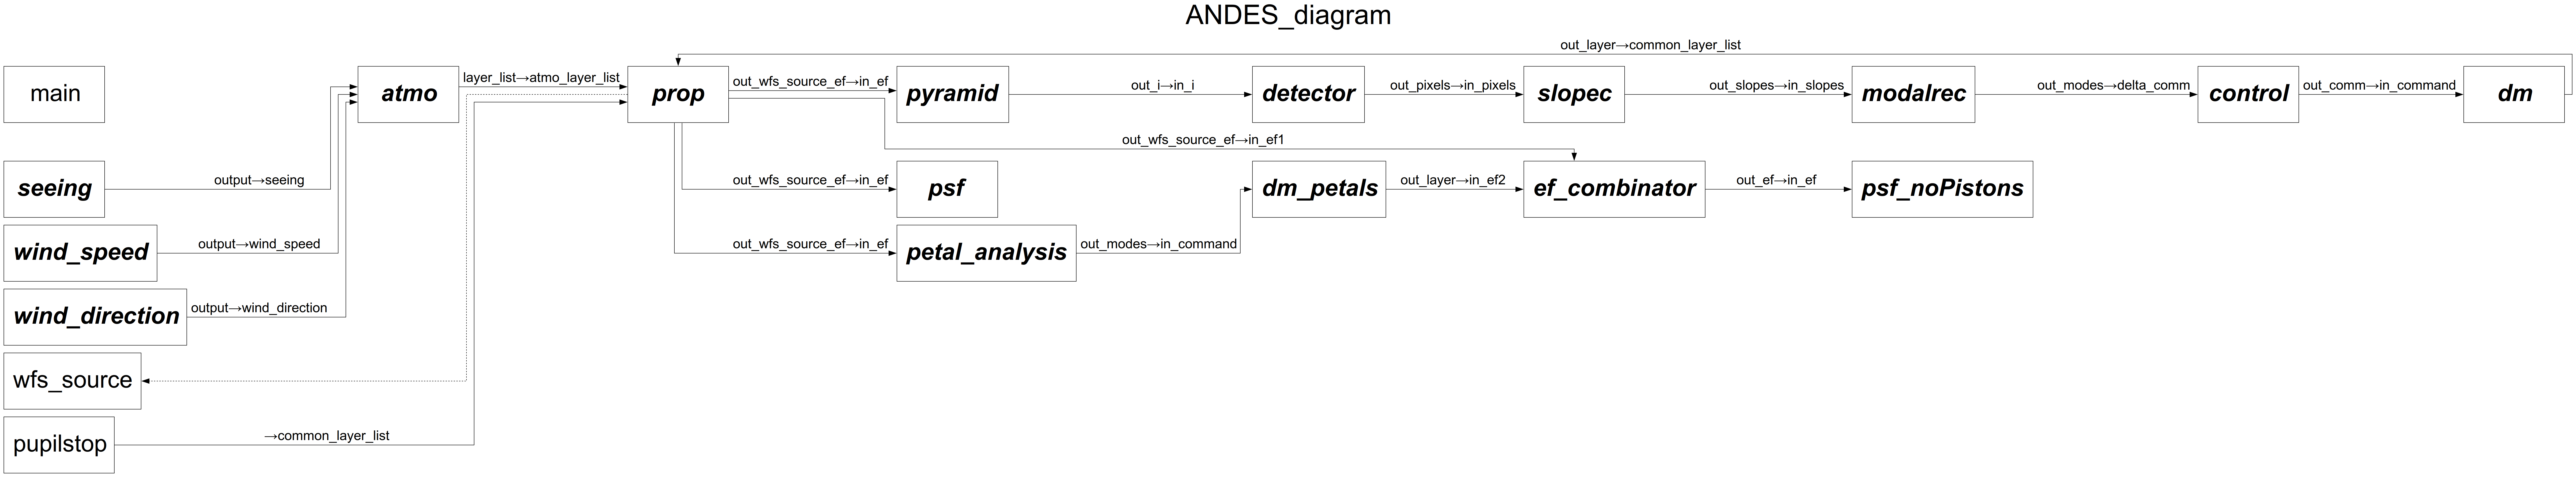

In [6]:
Image.open(os.path.join(base_path, 'ANDES_diagram.png') )

# 2.4 Running basic ANDES simulation: with displays

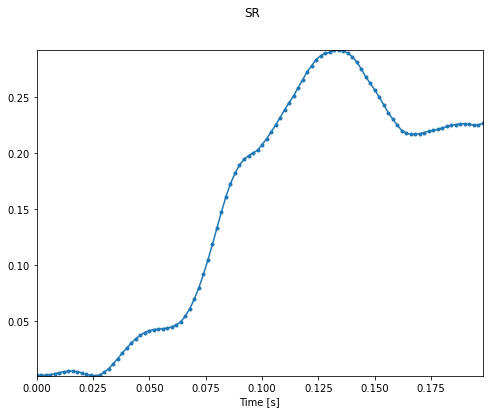

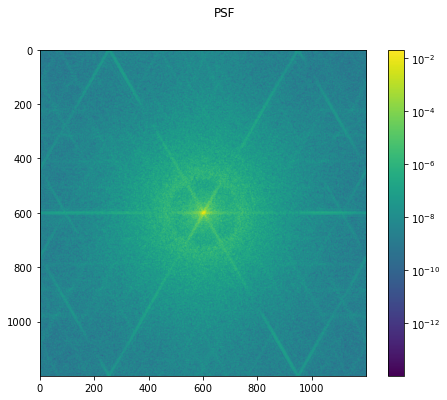

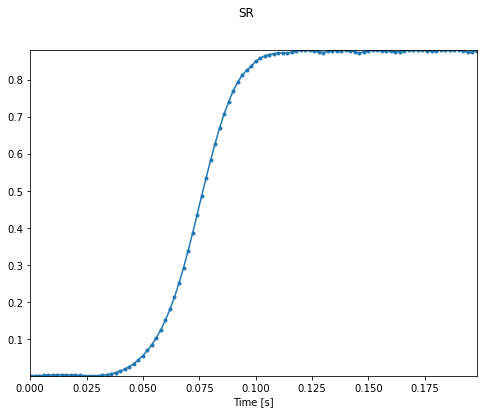

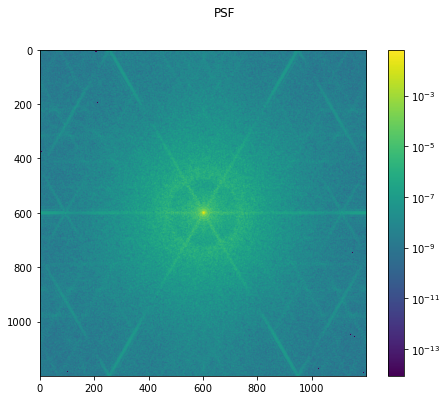

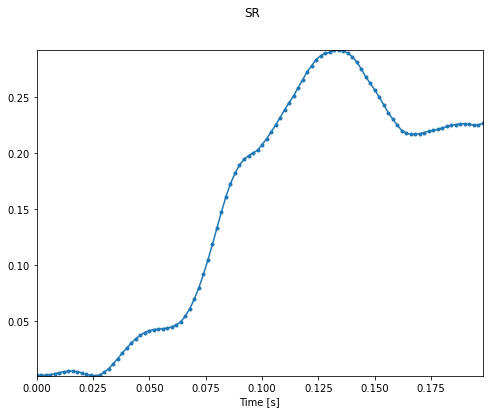

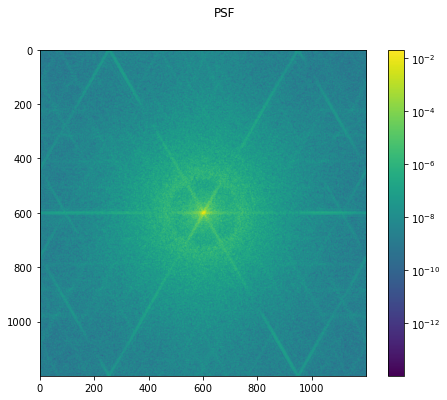

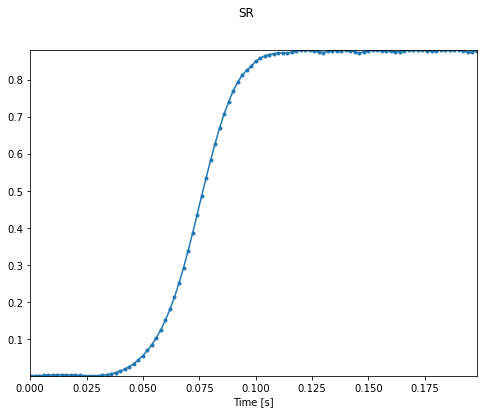

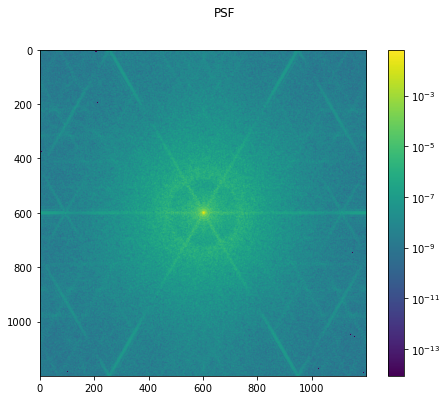

In [8]:
sys.stdout = open('log2_2.txt', 'w')
specula.main_simul(yml_files=[os.path.join(base_path, 'params_andes_basic.yml'),
                              os.path.join(base_path,'ov_add_display_andes.yml')],
                   diagram=True, diagram_filename=os.path.join(base_path, 'ANDES_diagram.png'), 
                   diagram_title='ANDES_diagram')
sys.stdout = notebook_stdout

# 2.5 Running basic ANDES simulation: with Lyot coronograh

In [8]:
sys.stdout = open('log2_4.txt', 'w')
specula.main_simul(yml_files=[os.path.join(base_path, 'params_andes_basic.yml'),
                              os.path.join(base_path, 'params_andes_coro_lyot.yml')],
                    diagram=True, 
                    diagram_filename=os.path.join(base_path, 'ANDES_diagram_Lyot.png'), 
                    diagram_title='ANDES_diagram - Lyot')
sys.stdout = notebook_stdout

In [ ]:
Image.open(os.path.join(base_path, 'ANDES_diagram_Lyot.png') )

In [9]:
! python analyse_psf_data.py out_int_psf

Cupy import successfull. Installed version is: 13.3.0
Comparing the following datasets:
  /home/frossi/dev/SPECULA/config/HandsOnSPECULA/output/20260211_183146

Loading: 20260211_183146
  ✓ srRes.fits: shape (100,)
  ✓ psf_coro_std.fits: shape (1, 1200, 1200)
  ✓ psf.fits: shape (1, 1200, 1200)
  ✓ psf_coro.fits: shape (1, 1200, 1200)
  ✓ psf_std.fits: shape (1, 1200, 1200)

SUMMARY STATISTICS

📊 20260211_183146 [INT, 500Hz]
   Wavelength: 2200 nm
   Frame rate: 500.0 Hz
   PSF pixel size: 3.878 mas
/home/frossi/dev/SPECULA/config/notebooks/analyse_psf_data.py:619: RuntimeWarning: Mean of empty slice.
  print(f"   Mean SR: {sr.mean():.4f} ± {sr.std():.4f}")
/opt/anaconda3/envs/base11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/envs/base11/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, 